In [58]:
import numpy as np
#if this fails, you need to put the case_studies.py file in the same folder
from case_studies import *

In [59]:
from scipy.optimize import minimize

#These are the example optimizers you should evaluate this week.
#These are optimizers implemented in scipy.
#they take as first 2 or 3 arguments the function f, its gradient df and sometimes its hessian Hf.
#the next parameters are all the same: x0 is the starting point, max_iterations the stopping criterion for iterations
#and epsilon the precision tolerance to be reached. 
#Note: epsilon is interpreted slightly differently across algorithms, and some algorithms might not reach the tolerance
#and stop early.
def scipy_bfgs(f,df,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="BFGS", jac=df, tol=epsilon,options={'maxiter':max_iterations, 'gtol':epsilon})
    return np.array(xs), np.array(grad_norms)

def scipy_newton(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="Newton-CG", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations,'xtol':epsilon})
    return np.array(xs), np.array(grad_norms)

def scipy_trust_region(f,df,Hf,x0,max_iterations,epsilon):  

    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="trust-exact", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations})
    return np.array(xs), np.array(grad_norms)

In [60]:
#example usage of the algorithms
#the output is a list of points evaluated on the function as well as the gradient norms at that point
#this algorithms has the first three arguments functions for function value, gradient and Hessian.
#For the 5 functions, those are named f1-f5 etc and cna be found in the case_studies.py file
x0=np.ones(2)
xs,grad_norms = scipy_trust_region(f4,df4,Hf4,x0, 1000, 1.e-10)


#the optimal point for a given function and dimensionality is stored in the package as well for at least 15 decimals precision
optimal = x_opt("f4", 2)
print("final solution point:", xs[-1])
print("distance of x from optimum", np.linalg.norm(xs[-1]-optimal))
print("number of function evaluations:", len(grad_norms))
print("final function value:", f4(xs[-1]))
print("final gradient norm:", grad_norms[-1])


final solution point: [0.00190933 0.00190933]
distance of x from optimum 1.1857524696459338e-11
number of function evaluations: 9
final function value: 1.2203194789920598e-05
final gradient norm: 9.977761920841575e-11


In [61]:
import matplotlib.pyplot as plt

x0=np.ones(2)
xs, grad_norms = scipy_newton(f1,df1,Hf1,x0, 1000, 1.e-10)


# plt.plot(fxs, fys)
print(grad_norms)


[2.000001e+03 1.998001e+00 1.000000e-15]


[-100 -100]
(2,)


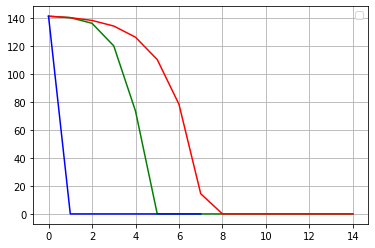

[[-1.00000000e+02 -1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 8.02554558e-04  8.02554558e-04]
 [ 1.38713916e-03  1.38713916e-03]
 [ 1.76171221e-03  1.76171221e-03]
 [ 1.89592838e-03  1.89592838e-03]
 [ 1.90921658e-03  1.90921658e-03]
 [ 1.90933108e-03  1.90933108e-03]]
[141.4240564392246, 0.0027002019150739204, 0.001565218374180717, 0.0007384909064207425, 0.00020876462097720494, 1.8954292740181256e-05, 1.6193651755651613e-07, 1.1857525003118021e-11]
[0.00190933 0.00190933]


In [62]:
def func_plot(func, dfunc, Hfunc, d, func_name, x0, color):
    # x0=np.ones(d)
    # print(x0.shape)
    # x0 = np.random.uniform(low=-10000, high=10000, size=(d,))
    # x0 = np.array([-100000]*d)
    # x0 = np.array([-100000, 1])
    print(x0)
    print(x0.shape)
    # print(f"x0 = {x0}") 
    xs1, grad_norms1 = scipy_bfgs(func,dfunc,x0, 10000, 1.e-10)
    xs2, grad_norms2 = scipy_trust_region(func,dfunc,Hfunc,x0, 10000, 1.e-10)
    xs3, grad_norms3 = scipy_newton(func,dfunc,Hfunc,x0, 10000, 1.e-10)
    # print(xs)                                                                 
    x_dist1 = np.zeros((len(xs1)))
    x_dist2 = np.zeros((len(xs2)))
    x_dist3 = np.zeros((len(xs3)))
    # print(xs.shape)
    x_dist1 = [np.linalg.norm(x) for x in (xs1 - x_opt(func_name, d))]
    x_dist2 = [np.linalg.norm(x) for x in (xs2 - x_opt(func_name, d))]
    x_dist3 = [np.linalg.norm(x) for x in (xs3 - x_opt(func_name, d))]
    # for i in range(len(xs)):
    #     x_dist1[i] = np.linalg.norm(xs1[i] - x_opt(func_name, d))
    #     x_dist2[i] = np.linalg.norm(xs2[i] - x_opt(func_name, d))
    #     x_dist3[i] = np.linalg.norm(xs3[i] - x_opt(func_name, d))


    # print(x_dist)
    # print(xs) 
    # plt.plot(np.arange(len(x_dist)), x_dist, color=color)
    # plt.plot(np.arange(len(x_dist1)), x_dist1, color="green")
    # print(x_dist1.shape)
    # print(x_dist1[5])
    # plt.yscale("log")
    # plt.xscale("log")
    plt.legend(["BFGS", "Trust Region", "Newton"])
    plt.grid()
    

    plt.plot(np.arange(len(x_dist1)), x_dist1, color="green")
    plt.plot(np.arange(len(x_dist2)), x_dist2, color="red")
    plt.plot(np.arange(len(x_dist3)), x_dist3, color="blue")
    plt.show()
    print(xs3)
    print(x_dist3)
    return

dims = 2

x0 = np.array([-100]*dims)

# x0 = np.random.uniform(low=-1000, high=1000, size=(dims))
# x1 = np.random.uniform(low=-1000, high=1000, size=(dims))
# x2 = np.random.uniform(low=-1000, high=1000, size=(dims))
# x3 = np.random.uniform(low=-1000, high=1000, size=(dims))

func_plot(f4, df4, Hf4, dims, "f4", x0, "green")
print(x_opt("f4", dims))
# func_plot(f3, df3, Hf3, dims, "f3", x1, "blue")f# func_plot(f3, df3, Hf3, dims, "f3", x2, "red")f# func_plot(f3, df3, Hf3, dims, "f3", x3, "yellow")
# func_plot(f2, df2, Hf2, 10, "f2")
# func_plot(f3, df3, Hf3, 10, "f3", "red")
# func_plot(f4, df4, Hf4, 10, "f4", "blue")
# func_plot(f5, df5, Hf5, 10, "f5", "purple")


Mean number of iterations for F1 with BFGS optimiser: 11.51
Variance of number of iterations for F1 with BFGS optimiser: 1.9699000000000004
Mean number of iterations for F1 with TRUST_REGION optimiser: 11.06
Variance of number of iterations for F1 with TRUST_REGION optimiser: 0.9364000000000001
Mean number of iterations for F1 with NEWTON optimiser: 3.53
Variance of number of iterations for F1 with NEWTON optimiser: 0.7691000000000001


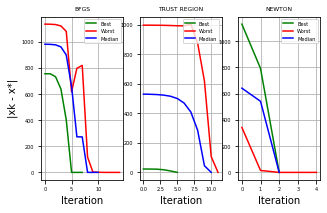

Mean number of iterations for F2 with BFGS optimiser: 1072.56
Variance of number of iterations for F2 with BFGS optimiser: 105581.42639999998
Mean number of iterations for F2 with TRUST_REGION optimiser: 191.48
Variance of number of iterations for F2 with TRUST_REGION optimiser: 2565.5296
Mean number of iterations for F2 with NEWTON optimiser: 384.32
Variance of number of iterations for F2 with NEWTON optimiser: 153721.9376


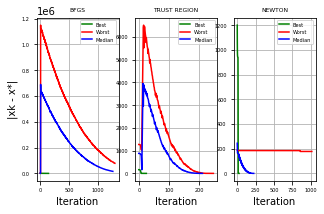

Mean number of iterations for F3 with BFGS optimiser: 87.3
Variance of number of iterations for F3 with BFGS optimiser: 98.18999999999998
Mean number of iterations for F3 with TRUST_REGION optimiser: 49.39
Variance of number of iterations for F3 with TRUST_REGION optimiser: 40.53789999999999
Mean number of iterations for F3 with NEWTON optimiser: 788.48
Variance of number of iterations for F3 with NEWTON optimiser: 159367.6296


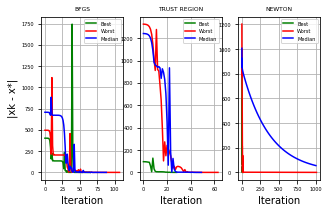

Mean number of iterations for F4 with BFGS optimiser: 29.62
Variance of number of iterations for F4 with BFGS optimiser: 106.5156
Mean number of iterations for F4 with TRUST_REGION optimiser: 16.97
Variance of number of iterations for F4 with TRUST_REGION optimiser: 0.8091000000000002
Mean number of iterations for F4 with NEWTON optimiser: 8.69
Variance of number of iterations for F4 with NEWTON optimiser: 1.2539000000000002


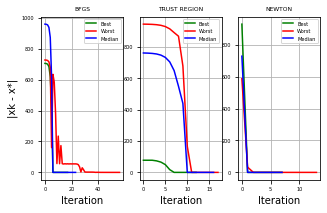

Mean number of iterations for F5 with BFGS optimiser: 43.71
Variance of number of iterations for F5 with BFGS optimiser: 17.8259
Mean number of iterations for F5 with TRUST_REGION optimiser: 34.49
Variance of number of iterations for F5 with TRUST_REGION optimiser: 13.0099
Mean number of iterations for F5 with NEWTON optimiser: 31.04
Variance of number of iterations for F5 with NEWTON optimiser: 7.458399999999999


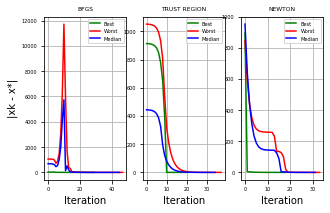

In [78]:
# Fix random seed
np.random.seed(42)
# Function for running specific optimiser and specific function
# on n random starting points
def run_optimiser(func, dfunc, Hfunc, optimiser, n, d, epsilon):
    # list of collected results
    results = []
    # generate random random starting points
    # with fixed random seed
    x0s = np.random.uniform(low=-1000, high=1000, size=(n, d))
    # loop through starting points and run optimiser
    for x0 in x0s:
        if optimiser.__name__ == "scipy_bfgs":
            xs, grad_norms = optimiser(func, dfunc, x0, 1000, epsilon)
        else:
            xs, grad_norms = optimiser(func, dfunc, Hfunc, x0, 1000, epsilon)
        # collect results
        results.append((xs, grad_norms))
    # compute the mean number of iterations
    mean_iter = np.mean([len(x[0]) for x in results])
    name_opt = optimiser.__name__.upper()
    name_opt.replace("_", " ")
    print(f"Mean number of iterations for {func.__name__.upper()} with {name_opt[6:]} optimiser: {mean_iter}")
    # compute the varance of number of iterations
    var_iter = np.var([len(x[0]) for x in results])
    print(f"Variance of number of iterations for {func.__name__.upper()} with {name_opt[6:]} optimiser: {var_iter}")
    return results

# Function for computing min max and mean of
# number of iterations and plottin them
def plot_min_max(func, optimiser, results, d, axs):
    # sort results by number of iterations
    results = sorted(results, key=lambda x: len(x[0]))
    min_iter = results[0][0]
    max_iter = results[-1][0]
    median_iter = results[len(results)//2][0]

    # compute the distance from optimal solution
    # for min max and median
    x_dist_min = [np.linalg.norm(x) for x in (min_iter - x_opt(func.__name__, d))]
    x_dist_max = [np.linalg.norm(x) for x in (max_iter - x_opt(func.__name__, d))]
    x_dist_median = [np.linalg.norm(x) for x in (median_iter - x_opt(func.__name__, d))]


    # plot min max and median
    axs.plot(np.arange(len(x_dist_min)), x_dist_min, label="Best", color="green")
    axs.plot(np.arange(len(x_dist_max)), x_dist_max, label="Worst", color="red")
    axs.plot(np.arange(len(x_dist_median)), x_dist_median, label="Median", color="blue")
    # set labels and legend
    name = optimiser.__name__.upper()
    # remove scipy_ from name
    if name.startswith("SCIPY_"):
        name = name[6:]
    axs.set_title(name.replace("_", " "), fontsize = 6)
    axs.set_xlabel("Iteration")
    axs.tick_params(axis='both', which='major', labelsize=5)
    axs.tick_params(axis='both', which='minor', labelsize=4)
    axs.legend(prop={'size': 5}, loc="upper right")
    axs.grid()


# Run through all functions and optimisers
# and plot min max and mean
optimisers = [scipy_bfgs, scipy_trust_region, scipy_newton]
functions = [(f1, df1, Hf1), (f2, df2, Hf2), (f3, df3, Hf3), (f4, df4, Hf4), (f5, df5, Hf5)]
for func, dfunc, Hfunc in functions:
    fig, axs = plt.subplots(1,3,figsize=(5,3))
    axs[0].set_ylabel("|xk - x*|")
    i_plot = 0
    for optimiser in optimisers :
        results = run_optimiser(func, dfunc, Hfunc, optimiser, 100, 2, 1e-6)      
        plot_min_max(func, optimiser, results, 2, axs[i_plot])
        i_plot +=1
    plt.show()

